In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving us-oil.csv to us-oil.csv


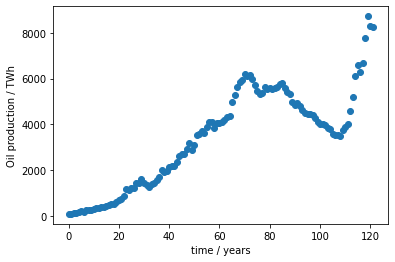

In [ ]:
# Exercise 15.1

uso = pd.read_csv('us-oil.csv') # importing us oil data
t_us = np.array(uso['Year']) - 1900 # time array (years)
dxdt_us = np.array(uso['Oil production (TWh)']) # oil production array

plt.plot(t_us, dxdt_us, 'o')
plt.xlabel("time / years")
plt.ylabel("Oil production / TWh")
plt.show()

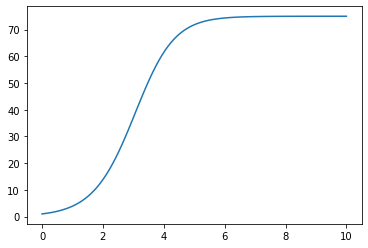

In [ ]:
# Exercise 15.2
# Numerical solution

C_num = 75 # carrying capacity
r_num = 1.5
t_num =np.linspace(0,10,100) # time
h=t_num[1]-t_num[0] # time delta
x_num=np.zeros(len(t_num)) # total oil produced

for i in range(len(t_num)-1):
    x_num[0] = 1
    x_num[i+1] = x_num[i] + h * (r_num * x_num[i] * (1 - x_num[i]/C_num)) # expression for x[i+1]

plt.plot(t_num, x_num)

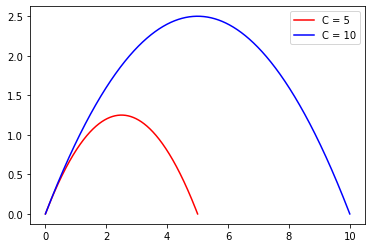

when C = 5 , dxdt max = 1.25
when C = 10 , dxdt max = 2.5


In [ ]:
#Exercise 15.5

def production(x,r,C): # creating a function for production
    return r * x * (1 -(x/C))

x_mod1 = np.linspace(0,5,1000) # setting the constants
r_mod1 = 1
C_mod1 = 5
dxdt_mod1 = production(x_mod1, r_mod1, C_mod1)
plt.plot(x_mod1, dxdt_mod1, 'r', label = 'C = 5')

x_mod2 = np.linspace(0,10,1000) # changing C
r_mod2 = 1
C_mod2 = 10
dxdt_mod2 = production(x_mod2, r_mod2, C_mod2)
plt.plot(x_mod2, dxdt_mod2, 'b', label = 'C = 10')

plt.legend()
plt.show()
print("when C =", C_mod1, ", dxdt max =", np.round(max(dxdt_mod1), 2))
print("when C =", C_mod2, ", dxdt max =",np.round(max(dxdt_mod2), 2))

Therefore, r = 0.06258155555791334
And c = 382298.780258337


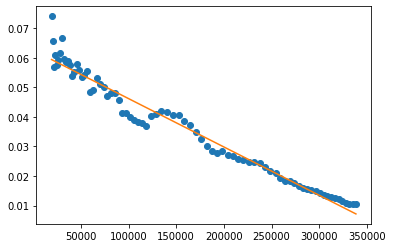

In [ ]:
#Exercise 15.7

from scipy import optimize

dxdt_c = dxdt_us[0:109] # cropping out the post-2008 spike
dxdt_h = np.cumsum(dxdt_c) # accumulating the data, creating s-shape
f = dxdt_c/dxdt_h
dxdt_hc = dxdt_h[30:] # cropping the values to obtain a more linear trend
f_c = f[30:]

def linear(x, m, c): # creating a linear function
    return m * x + c

coeffs=optimize.curve_fit(linear, dxdt_hc, f_c)[0] # calculating the coefficients of the line 'of best fit'

x_range = np.linspace(np.min(dxdt_hc), np.max(dxdt_hc), 100) # creating the appropriate range of x values
y_fitted = [linear(i, coeffs[0], coeffs[1]) for i in x_range] # creating a fitted line using the coefficients

plt.plot(dxdt_hc, f_c,'o')
plt.plot(x_range, y_fitted)

r = coeffs[1] # using this line to obtain r and C
print("Therefore, r =",r)

C = - r / coeffs[0]
print("And c =", C)

3387.5443293148533


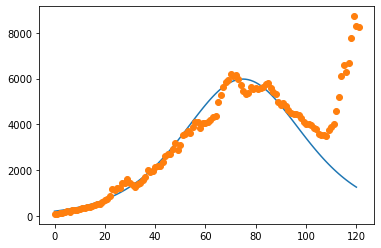

In [ ]:
#Exercise 15.8

t_c = t_us[:109] # cropping out the 2008 spike

x0 = C/(1 + ((C / np.max(dxdt_hc) - 1) * np.exp (r * np.max(t_c)))) # calculating x0 using calculated values of r and C
print(x0)

dxdt_h_est = C/(1 + ((C - x0) / x0) * np.exp(- r * t_us)) # using this to generate an s-shaped curve

dxdt_est = np.diff(dxdt_h_est) # taking the difference between values to obtain a parabola
plt.plot(t_us[:-1], dxdt_est)
plt.plot(t_us, dxdt_us, 'o')
plt.show()

Exercise 15.9
In theory, the logistic function could be used to model world oil production as it is useful in modelling other, similar examples of resource limited growth, such as population growth or viral infection. However, there are substantial practical limitations which inhibit the efficacy of this model in real world description or prediction. In this case study, the limitation that was most pronounced was the inability of the logistic model to predict the appearance new cycles of growth. This is precisely what happened in the U.S. in 2009 and the result is that, from 2009 onwards, the real-world oil production data did not conform to the estimated curve at all, making the logistic model ineffective for either description or prediction. Another limitation of the predictive powers of this model arises since the initial gradient of the rate of production in the exponential growth phase is similar for a range of values of carrying capacity, making it difficult to use these measurements to meaningfully predict when peak oil production will occur. Therefore, despite its theoretical applicability, the logistic function is totally unreliable in describing or predicting rate of oil production in practice, and this is why all 'peak oil' have been unfounded thus far.
Furthermore, when discussing the limiting factor for future oil production, economic viability may be more relevant limiting factor than physical abundance. Ultimately, oil production is driven by industrial profit, so the presence of other supply-limiting constraints such as increased extraction costs or more difficult transportation could drive up oil prices and reduce profit margins. These economic constraints are related to, but not identical to the quantity of oil in the ground, with discrepancies arising due to additional difficulties and inefficiencies in the process of obtaining and distributing oil. If oil production becomes an unprofitable enterprise the supply will decrease or cease altogether, and this is likely to occur well before we use up all our physical oil resources. Consequently, models of economic factors such as extraction costs as a function of time may be more useful in predicting a timeline for oil production.
Finally, I would argue that the question is not whether we can continue to supply oil, but whether we should. Humanity's use of oil and other fossil fuels is responsible for the emission of 12.5 GT of CO2 into the atmosphere every year. This is a huge contributing factor in the increase of greenhouse gases content in the atmosphere, which drives global warming and climate change. It is clear that a reduction in oil consumption, and a transition into other, renewable forms of energy production will be necessary in order to control and stabilise the rising global temperature. Certainly, this process will be a slow one, but this should be the primary driving force behind humanity's energy transition and cessation of oil production, rather than a limitation in physical abundance or economic viability.
So, to conclude, the logistic function, though theoretically applicable, is not useful in real-world description or prediction of oil production, and our transition away from oil as a primary means of energy production will most likely arise due to factors other than physical abundance, which the logistic function seeks to describe.
